# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [98]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as sct

import seaborn as sns

import statsmodels.api as sm
import statsmodels.stats as st

import plotly.graph_objects as go
import plotly.offline as py

from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE



In [ ]:
# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [6]:
dados = pd.read_csv("https://raw.githubusercontent.com/luislauriano/AceleraDev_DataScience/master/data/fifa.csv")

In [8]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    dados.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [9]:
# Sua análise começa aqui.
dados.head()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [15]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              18207 non-null  int64  
 1   Overall          18207 non-null  int64  
 2   Potential        18207 non-null  int64  
 3   Crossing         18159 non-null  float64
 4   Finishing        18159 non-null  float64
 5   HeadingAccuracy  18159 non-null  float64
 6   ShortPassing     18159 non-null  float64
 7   Volleys          18159 non-null  float64
 8   Dribbling        18159 non-null  float64
 9   Curve            18159 non-null  float64
 10  FKAccuracy       18159 non-null  float64
 11  LongPassing      18159 non-null  float64
 12  BallControl      18159 non-null  float64
 13  Acceleration     18159 non-null  float64
 14  SprintSpeed      18159 non-null  float64
 15  Agility          18159 non-null  float64
 16  Reactions        18159 non-null  float64
 17  Balance     

In [16]:
dados.dtypes

Age                  int64
Overall              int64
Potential            int64
Crossing           float64
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Interceptions      float64
Positioning        float64
Vision             float64
Penalties          float64
Composure          float64
Marking            float64
StandingTackle     float64
SlidingTackle      float64
GKDiving           float64
GKHandling         float64
GKKicking          float64
GKPositioning      float64
GKReflexes         float64
d

## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [40]:
#Vamos verificar se temos valores nulos e suas porcentagens
dados.isnull().sum()

Age                0
Overall            0
Potential          0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

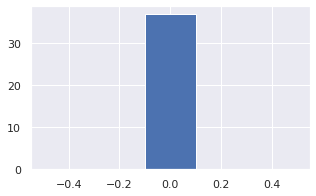

In [41]:
#Porcentagem dos valores nulos
missing = dados.isnull().sum() / dados.shape[0]

plt.figure(figsize = (5,3))
plt.hist(missing, bins=5);

In [44]:
#Vamos deletar os valores nulos usando o método drop
dados.dropna(inplace=True)
dados.isnull().sum()

Age                0
Overall            0
Potential          0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

Vamos agora aplicar o PCA no nosso conjunto de dados


## **Redução de Dimensionalidade: Principal Component Analysis (PCA)**

A análise de componentes principais (PCA) é um método para extração das variáveis importantes a partir de um grande conjunto de variáveis disponíveis em um conjunto de dados. Esta técnica permite extrair um número pequeno de conjuntos dimensionais a partir de um dataset altamente dimensional. Com menos variáveis a visualização também se torna muito mais significativa.

In [60]:
# Aplicando o PCA no nosso conjunto de dados, mas sem reduzir a dimensionalidade:
pca = PCA().fit(dados)

# Fração da variância:
evr = pca.explained_variance_ratio_
print(evr.max())

0.5652805550008515


In [59]:
#Reduzindo a dimensionalidade
pca = PCA(n_components=3)
pcamodel = pca.fit_transform(dados)

In [65]:
# Gráfico do PCA:
fig = go.Figure()
fig = go.Figure(data=[go.Scatter3d(x=pcamodel[:, 0],
                    y=pcamodel[:, 1],
                    z=pcamodel[:, 2],
                    marker=dict(opacity=1,
                    reversescale=True,
                    colorscale='Blues',
                    color='#228B22',
                    size=2.5),
                    line=dict (width=0.09),
                    mode='markers')])

# Layout:
fig.update_layout(scene=dict(xaxis=dict( title="PCA1"),
                                yaxis=dict( title="PCA2"),
                                zaxis=dict(title="PCA3")),
                                template='plotly_dark',
                                title="PCA",
                                font=dict(family="Courier New, monospace",
                                          size=12, 
                                          color="#ffffff"),
                                          autosize=False,
                                          width=700,
                                          height=400)


# Plot:
py.iplot(fig)

In [66]:
def q1():
    #PCA
    pca = PCA().fit(fifa)

    # Fração da variância:
    evr = pca.explained_variance_ratio_
    return floar(round(evr[0]),3)

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

Podemos achar o número de componentes necessários para explicar determinada fração da variância total, dessa forma:

In [68]:
#Componentes necessarios para explicar uma fração da variancia >= 95% (0.95)
cumulative_variance_ratio = np.cumsum(evr)
component_number = np.argmax(cumulative_variance_ratio >= 0.95) + 1 # Contagem começa em zero.
component_number

15

In [72]:
def q2():
    # PCA:
    pca = PCA(.95).fit_transform(fifa)

    # Número de componentes:
    return pca.shape[1]


## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [73]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

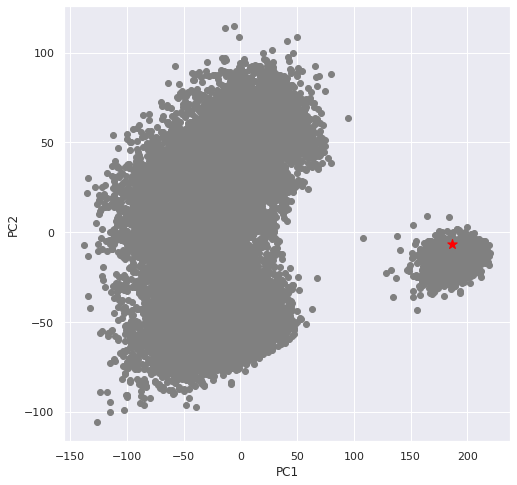

In [77]:
#Visualizando onde está esse ponto x

#dados:
pca = PCA().fit(dados)

#gera coordenadas de cada amostra baseado no loading score e scaled data:
pca_points = pca.transform(dados)

#ponto x
point = pca.components_.dot(x)

plt.figure(figsize=(8,8))
plt.scatter(pca_points[:, 0], pca_points[:, 1], c='gray')
plt.scatter(point[0], point[1], c='red',marker="*", s=100)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [75]:
def q3():
    # PCA:
    pca = PCA(n_components=2).fit(fifa)

    # Coordenadas (primeiro e segundo componentes principais):
    return tuple([round(x,3) for x in pca.components_.dot(x)])


## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

O **Recursive Feature Elimination (RFE)** é uma técnica para seleção de atributos. Basicamente ele remove recursivamente os atributos e constrói o modelo com os atributos remanescentes. Essa técnica utiliza a acurácia do modelo para identificar os atributos que mais contribuem para prever a variável alvo.

Para a solução do exercício foi utilizada a técnica de eliminação recursiva de atributos com um algortimo de Regressão linear para selecionar as 5 melhores variáveis preditoras.

Antes de resolver o exercício vamos visualizar graficamente quais os atributos mais importantes. A lib Yellowbrick possui o atributo FeatureImportances para classificar e plotar as importâncias relativas.

In [100]:
from yellowbrick.features import FeatureImportances
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression;

In [101]:
#RFE com estimador de regr linear com 5 variáveis para selecionar
reg = LinearRegression()
rfe = RFE(reg, n_features_to_select= 5)

In [102]:
#Vamos definir as variáveis de treino
X = dados.drop(columns ='Overall')
y = dados['Overall']

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



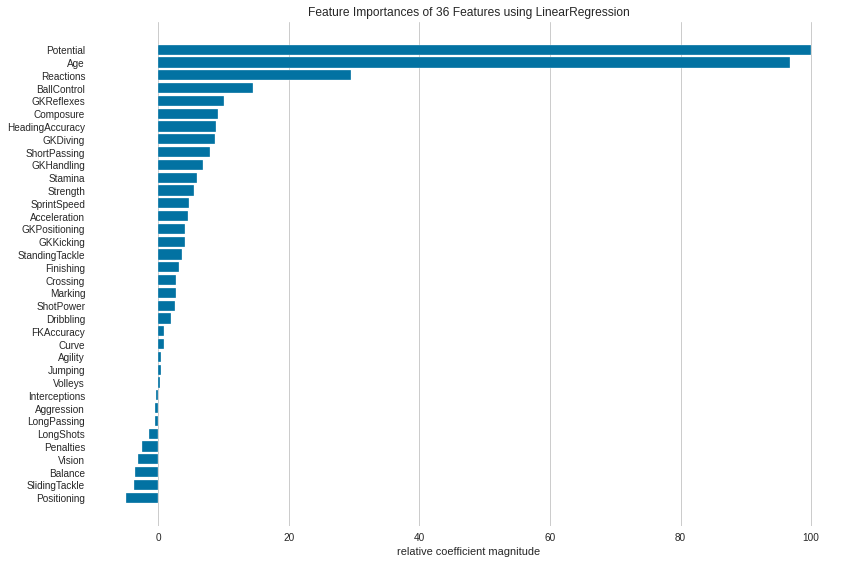

In [103]:
# Gráfico :
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

# Layout:
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Plot:
viz = FeatureImportances(LinearRegression(), ax=ax)
viz.fit(X, y)
viz.poof();

In [105]:
#Fit nos dados
rfe.fit(X, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

In [109]:
#Vendo quais colunas foram selecionadas
rfe.support_
pd.DataFrame({'coluna': X.columns,
              'bool': rfe.get_support()}).sort_values(by='bool',ascending=False).head(6).reset_index(drop=True)

,coluna,bool
0,Age,True
1,BallControl,True
2,Potential,True
3,Reactions,True
4,GKReflexes,True
5,ShortPassing,False


In [110]:
def q4():
    #Criação do modelo
    reg = LinearRegression()
    rfe = RFE(reg, n_features_to_select= 5)
    
    #Definir a variavel de treino e alvo
    X = fifa.drop(columns ='Overall')
    y = fifa['Overall']
    
    
    rfe.fit(X, y)
    
    return list(X.columns[rfe.support_])